# Providing tokenisation and word alignment

This is probably the most common use-case for this library. You have data that is already tokenised and aligned,
 and you want to calculate the metrcics. That means that the text still needs to be parsed. So under the hood the
 `stanza` parser still needs to process the data.

In [1]:
from astred import AlignedSentences, Sentence

First we need to create the source and target `Sentence` objects by passing space-sparated tokens and specifying which
 language the parser should use. In this case, English (en) and Dutch (nl). These parsed sentences can then be used to
 created an aligned object, but for that we need word alignments. These should be written in the Pharaoh format `i-j`
 where `i` is the index of a source token and `j` the index of the target token that it is aligned with. And that's it!

In [2]:
sent_en = Sentence.from_text("The show is billed as the museum 's largest ever .", "en")
sent_nl = Sentence.from_text("Dit is de duurste voorstelling ooit in het museum .", "nl")
aligns = "0-0 0-2 1-4 2-1 3-1 4-1 5-7 6-8 7-6 8-3 9-5 10-9"

aligned = AlignedSentences(sent_en, sent_nl, word_aligns=aligns)

We can now loop over the words in a sentence. Note that we explicitly ask for `Word`s that are not NULL words. If you
 want to iterate over all `Word`s, including NULL, then use `for word in aligned.src`. For each word you can also find
 the word(s) that it is aligned with, which allows for some interesting analyses.

In [5]:
for word in sent_nl.no_null_words:
	for aligned_word in word.aligned:
		print(word.text, aligned_word.text, word.deprel, aligned_word.deprel)

Dit The nsubj det
is is cop aux
is billed cop root
is as cop case
de The det det
duurste largest amod obl
voorstelling show root nsubj
ooit ever advmod advmod
in 's case case
het the det det
museum museum obl nmod
. . punct punct


For each word you can also see whether some of its properties differ from its aligned word(s). For instance, in the
 example below we check for the Dutch word "is" whether its POS label has changed. `.changes()` returns a
 dictionary of an integer (word_id of aligned word) to a boolean (whether or not the label has changed).

In [15]:
verb_is = sent_nl[2]
print("Dutch:", verb_is.text, verb_is.upos)
for aligned_id, change in sent_nl[2].changes("upos").items():
	print("Aligned:", sent_en[aligned_id].text, sent_en[aligned_id].upos, change)

Dutch: is AUX
Aligned: is AUX False
Aligned: billed VERB True
Aligned: as ADP True


The library also provides word-based metrics such as sequence cross and SACr cross. For every sentence, we
 can iterate over its created groups. Terminology-wise, we use "spans" to refer to the groups. Those spans have
 their own properties. You can just get their text, but because spans are aligned to other spans (on the other side)
 you can get those as well (similar to above). It follows that spans can cross other spans when they move, so you can
 get their `cross` value as well.

We have to iterate `no_null_*_spans` because NULL words form their own spans.

In [21]:
for span in sent_en.no_null_seq_spans:
	for aligned_span in span.aligned:
		print(span.text, aligned_span.text, span.cross)

The Dit 1
The de 1
show voorstelling 2
is billed as is 2
the museum het museum 3
's in 3
largest duurste 3
ever ooit 2
. . 0


For SACr groups you can additionally find the root node in that group. That is the node that is highest in the
 dependency tree. Below we first visualise the source tree and then show for each SACr span its root.

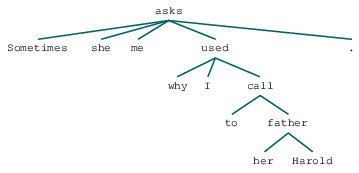

Sometimes Sometimes
she she
asks asks
me me
why why
I I
used to call used
her father Harold father
. .


In [25]:
from nltk.tree import Tree as NltkTree
from IPython.display import display

sent_en = Sentence.from_text("Sometimes she asks me why I used to call her father Harold .", "en")
sent_nl = Sentence.from_text("Soms vraagt ze waarom ik haar vader Harold noemde .", "nl")
aligns = "0-0 1-2 2-1 4-3 5-4 6-8 7-8 8-8 9-5 10-6 11-7 12-9"

aligned = AlignedSentences(sent_en, sent_nl, word_aligns="0-0 1-2 2-1 4-3 5-4 6-8 7-8 8-8 9-5 10-6 11-7 12-9")

display(NltkTree.fromstring(sent_en.tree.to_string()))

for span in sent_en.no_null_sacr_spans:
	print(span.text, span.root.text)
